### Installing Libraries

In [9]:
! pip install folium
! pip install pivottablejs
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install plotly
! pip install missingno
! pip install pandas_profiling
! pip install mpld3
! pip install sklearn
! pip install pandas-profiling

## Importing Data

In [15]:

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl

from matplotlib.pyplot import GridSpec
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import make_blobs
import missingno as msno
import pivottablejs
import pandas_profiling
import logging

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [12]:
logfilename = 'log_EnergyConsumption.txt'
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')

logging.debug('Loading Data into Dataframe')
try :  
    data= pd.read_csv("./Dataset/energydata_complete.csv")
    
except :
    logging.ERROR('Data logging failed')

### Load Data

In [13]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

<h2>Variable Description</h2>

<ul>
	<li>date time year-month-day hour:minute:second&nbsp;</li>
	<li>Appliances, energy use in Wh</li>
	<li>lights, energy use of light fixtures in the house in Wh</li>
	<li>T1, Temperature in kitchen area, in Celsius</li>
	<li>RH_1, Humidity in kitchen area, in %</li>
	<li>T2, Temperature in living room area, in Celsius</li>
	<li>RH_2, Humidity in living room area, in %</li>
	<li>T3, Temperature in laundry room area</li>
	<li>RH_3, Humidity in laundry room area, in %</li>
	<li>T4, Temperature in office room, in Celsius</li>
	<li>RH_4, Humidity in office room, in %</li>
	<li>T5, Temperature in bathroom, in Celsius</li>
	<li>RH_5, Humidity in bathroom, in %</li>
	<li>T6, Temperature outside the building (north side), in Celsius</li>
	<li>RH_6, Humidity outside the building (north side), in %</li>
	<li>T7, Temperature in ironing room , in Celsius</li>
	<li>RH_7, Humidity in ironing room, in %</li>
	<li>T8, Temperature in teenager room 2, in Celsius</li>
	<li>RH_8, Humidity in teenager room 2, in %</li>
	<li>T9, Temperature in parents room, in Celsius</li>
	<li>RH_9, Humidity in parents room, in %</li>
	<li>To, Temperature outside (from Chi&egrave;vres weather station), in Celsius</li>
	<li>Pressure (from Chi&egrave;vres weather station), in mm Hg</li>
	<li>RH_out, Humidity outside (from Chi&egrave;vres weather station), in %</li>
	<li>Windspeed (from Chi&egrave;vres weather station), in m/s</li>
	<li>Visibility (from Chi&egrave;vres weather station), in km</li>
	<li>Tdewpoint (from Chi&egrave;vres weather station), &deg;C</li>
	<li>rv1, Random variable 1, nondimensional</li>
	<li>rv2, Rnadom variable 2, nondimensional</li>
</ul>

<p>Where indicated, data from the nearest airport weather station (Chi&egrave;vres Airport, Belgium) was downloaded from a public data set from&nbsp;</p>

<p>Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.<br />
&nbsp;</p>


<p><img alt="" src="./images/First Floor_dimensions removed.png" /></p>

<p><img alt="" src="./images/Second Floor_lines removed.png" /></p>


In [16]:
data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.411665    755.522602   
std        ...           2.014712      4.151497      5.317409      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.666667    750.933333   
50%        ...          19.390000     40.900000      6.916667    756.100000   
75%        ...          20.600000     44.338095     10.408333    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [17]:
data.shape

(19735, 29)

#### Added Number of Seconds From Midnight column 

In [18]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Added Number of Seconds From Midnight column ')

try :
    data['NSM'] = pd.to_datetime(data['date'])
    (data['NSM'].dt.hour*60 + data['NSM'].dt.minute)*60 + data['NSM'].dt.second
    
except :
    logging.ERROR('Addition of midnight column failed')

In [19]:
data.shape

(19735, 30)

In [20]:
data.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [22]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Number of Null values')

try :
    data.isnull().sum()
    
except :
    logging.ERROR("can't show Null values, it failed")  

In [23]:
data.groupby('T1')

In [24]:
data.T1.nunique()

722

In [47]:
data.T1.value_counts()

21.000000    514
21.390000    484
21.200000    481
21.500000    458
21.290000    455
20.890000    435
21.100000    422
22.200000    411
21.890000    407
22.000000    401
21.790000    400
20.790000    398
22.100000    391
21.700000    383
21.600000    365
20.700000    301
22.390000    300
22.600000    296
22.500000    294
22.290000    289
22.890000    289
22.700000    287
20.600000    275
22.790000    274
23.000000    246
20.000000    244
20.100000    231
19.890000    211
20.500000    201
20.200000    198
            ... 
24.703636      1
25.760000      1
20.620000      1
24.464935      1
24.102597      1
24.426364      1
23.798701      1
18.767500      1
23.833766      1
24.771818      1
23.521714      1
23.716883      1
24.114286      1
24.676364      1
24.553636      1
23.840000      1
17.763333      1
25.525000      1
24.348052      1
23.763333      1
24.839571      1
23.675000      1
24.485455      1
24.690000      1
24.735455      1
24.594545      1
24.708182      1
24.753636     

In [27]:
all_columns = data.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'NSM']

In [28]:
data['Appliances'].nunique()

92

### Correlation Analysis

In [29]:
indoor_temp_data_1 = data[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


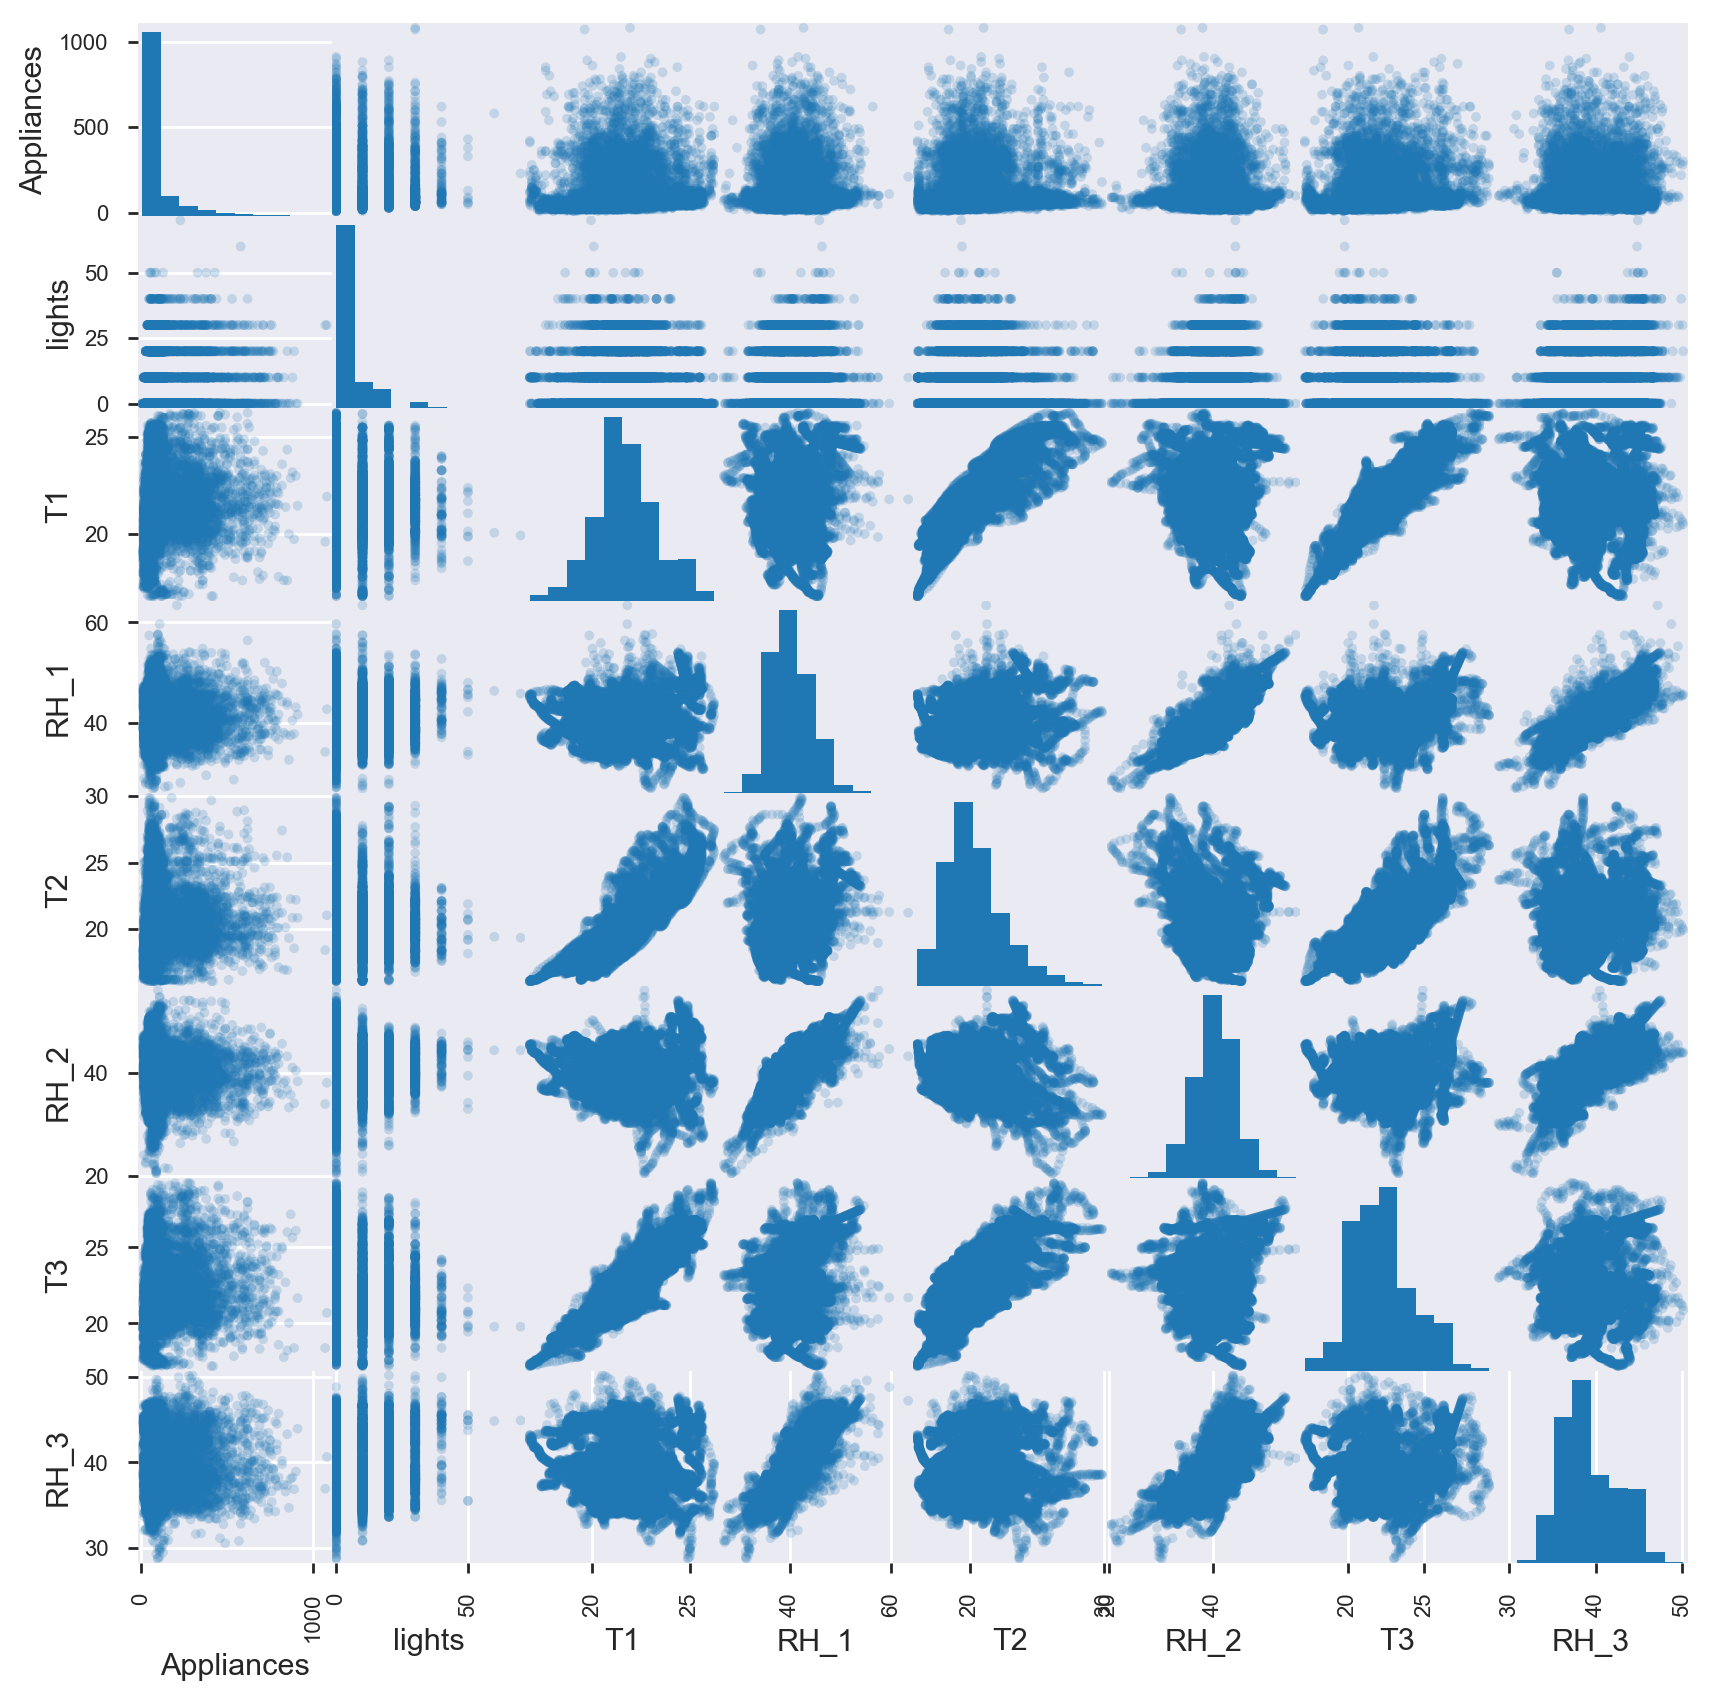

In [78]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Pair plots for T1, RH_1, T2, RH_2, T3, RH_3, Appliances and Lights')

try :
    
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(indoor_temp_data_1[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']], alpha = 0.2, diagonal = 'hist', ax = ax)
    plt.savefig("./Result/pairplot_for_K_Li_La.png")
except :
    logging.ERROR("Failed to show the plots")  


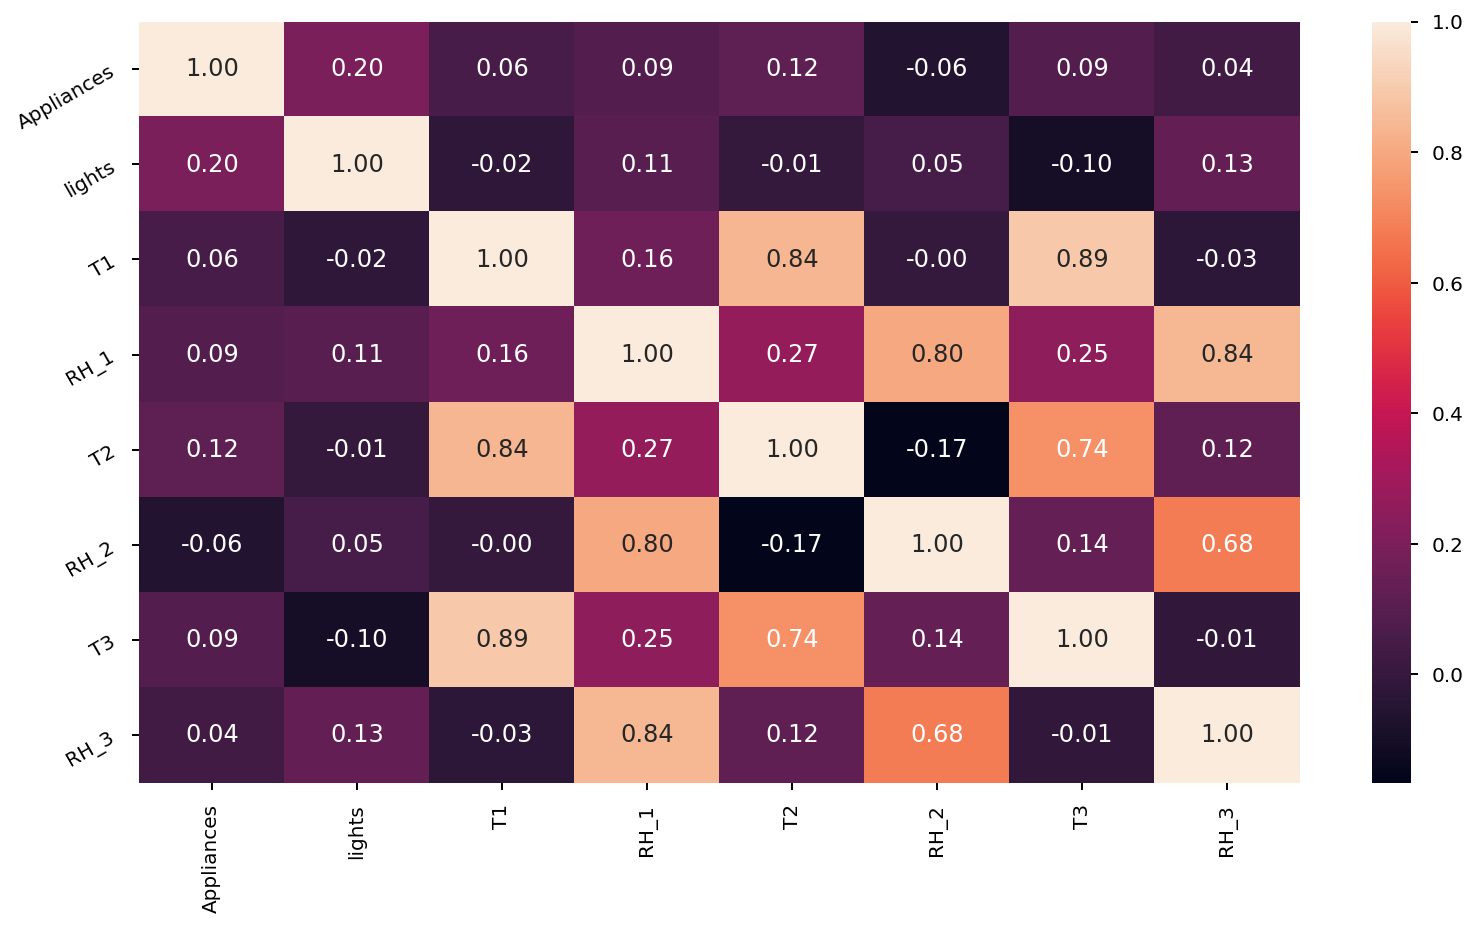

In [30]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')
logging.debug('Heat map for T1, RH_1, T2, RH_2, T3, RH_3, Appliances and Lights')

try :
    
    correlation =indoor_temp_data_1.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
    plt.savefig("./Result/HeatMap_for_K_Li_La.png.png")

except :
    logging.ERROR("Failed to show the plots")  




<p>
The above 2 figures shows the Relationship between the energy consumption of appliances with: lights, T1, RH_1, T2, RH_2, T3, RH_3. T1 and RH_1 correspond to the kitchen conditions, T2 and RH_2 corrspond to the living room conditions and T3 and RH_3 correspond to the laundry room area.<p>

#### Observation

The figure shows that there is a positive correlation between Appliances and lights(0.19), The highest correlation is between Appliances and T2(living room temp), There is also negative correlation between the Appliances and RH_2 (humidity). 

In [31]:
data_1 = data[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']]

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


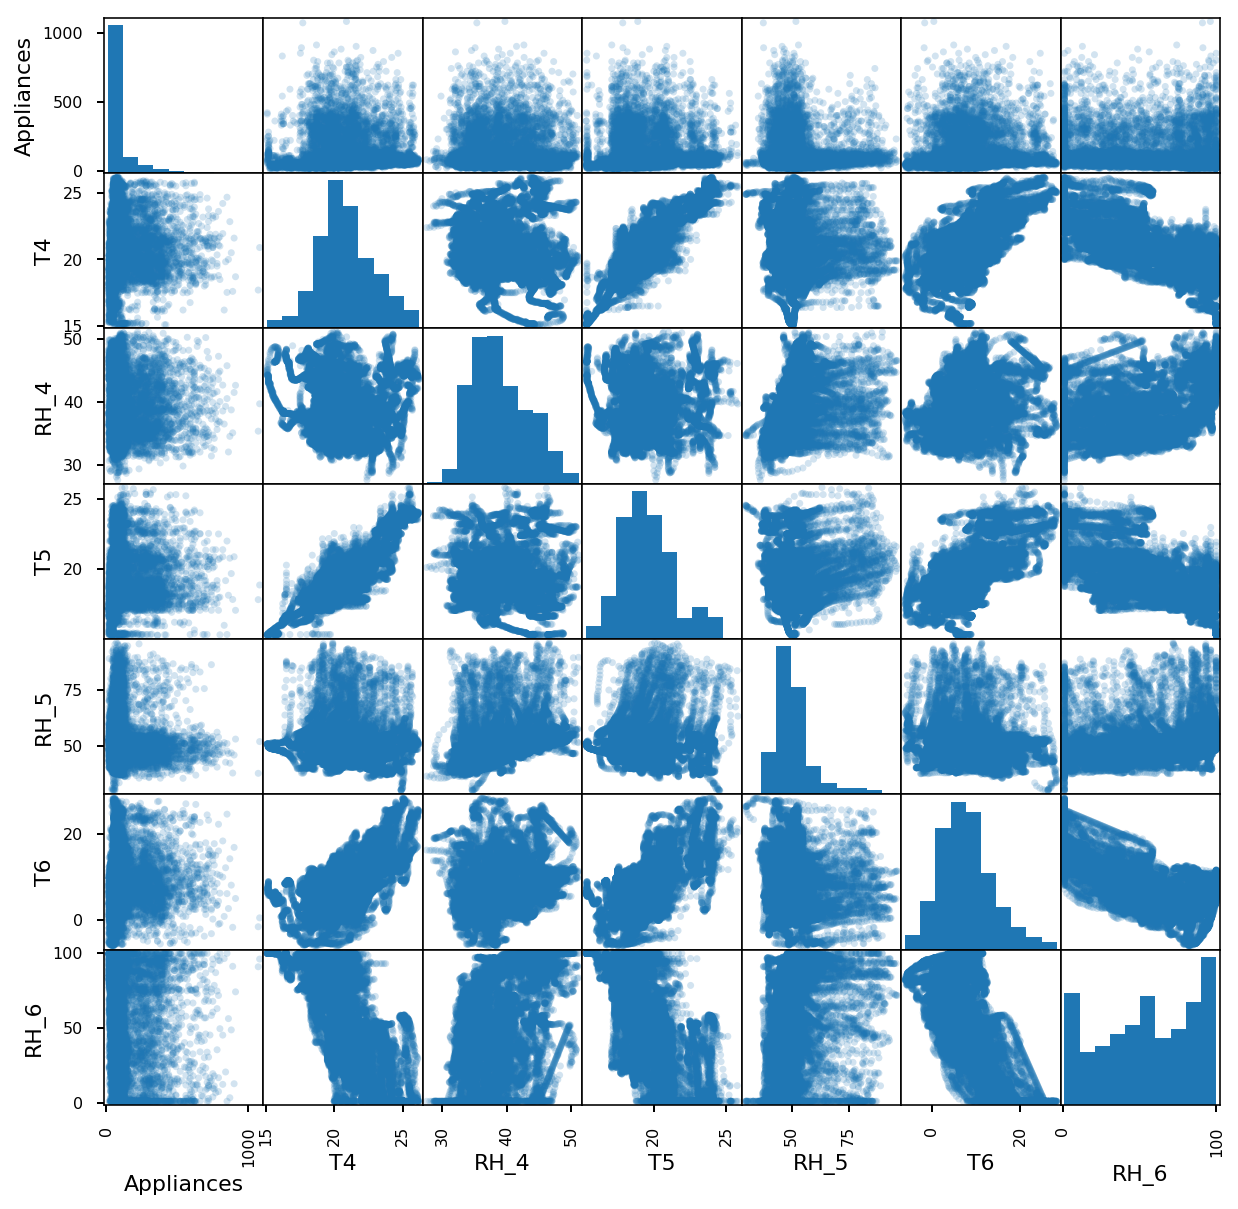

In [32]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Pair plots for T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ')

try :
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(data_1[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6' ]], alpha = 0.2, diagonal = 'hist', ax = ax)
    plt.savefig("./Result/PairPlots_for_Of_Ba_Out.png")
except :
    logging.ERROR("Failed to show the Pair plots for T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ")  


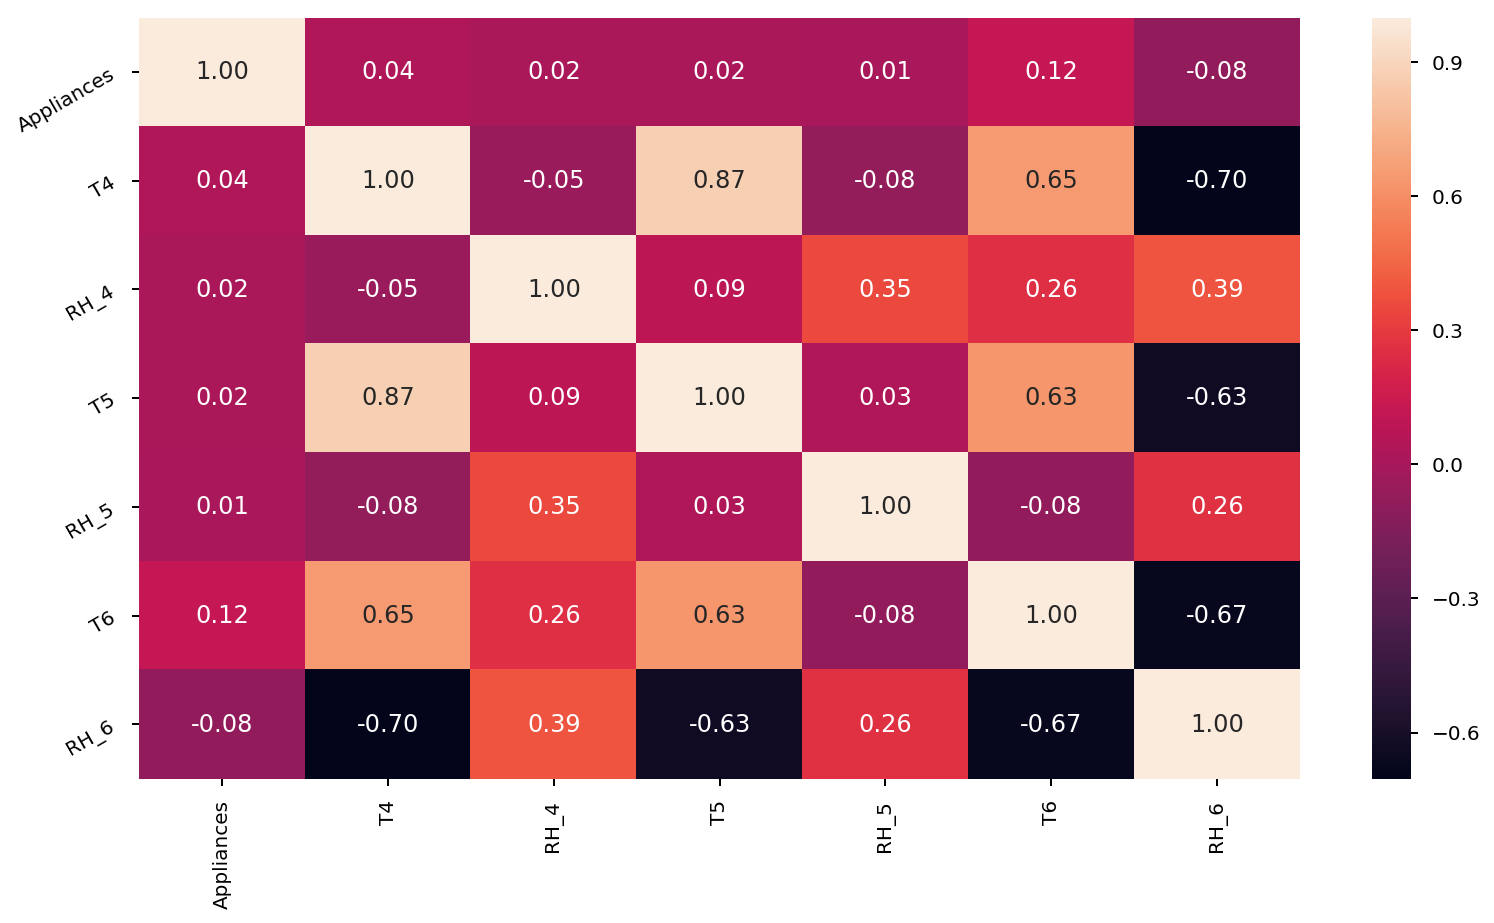

In [33]:


logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ')

try :
    correlation1 = data_1.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation1,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
    plt.savefig("./Result/HeatMap_for_Of_Ba_Out.png")

except :
    logging.ERROR("Failed to show the Heat map of T4, RH_4, T5, RH_5, T6, RH_6 and Appliances ")  



<p>The above figures shows the Relationship between the energy consumption of appliances with: lights, T4, RH_4, T5, RH_5, T6, RH_6. T4 and RH_4 correspond to the office room conditions, T5 and RH_5 corrspond to the bathroom conditions and T6 and RH_6 correspond to the Temperature and Humidity outside the building.<p>

### Observation

The figure shows that there is a positive correlation between Appliances and  T4, T5, T6, RH_4, RH_5. The highest correlation is between Appliances and T6(outside temp), There is also negative correlation between the Appliances and RH_6 (humidity).

In [34]:
room_temp = data[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']]

C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':
C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


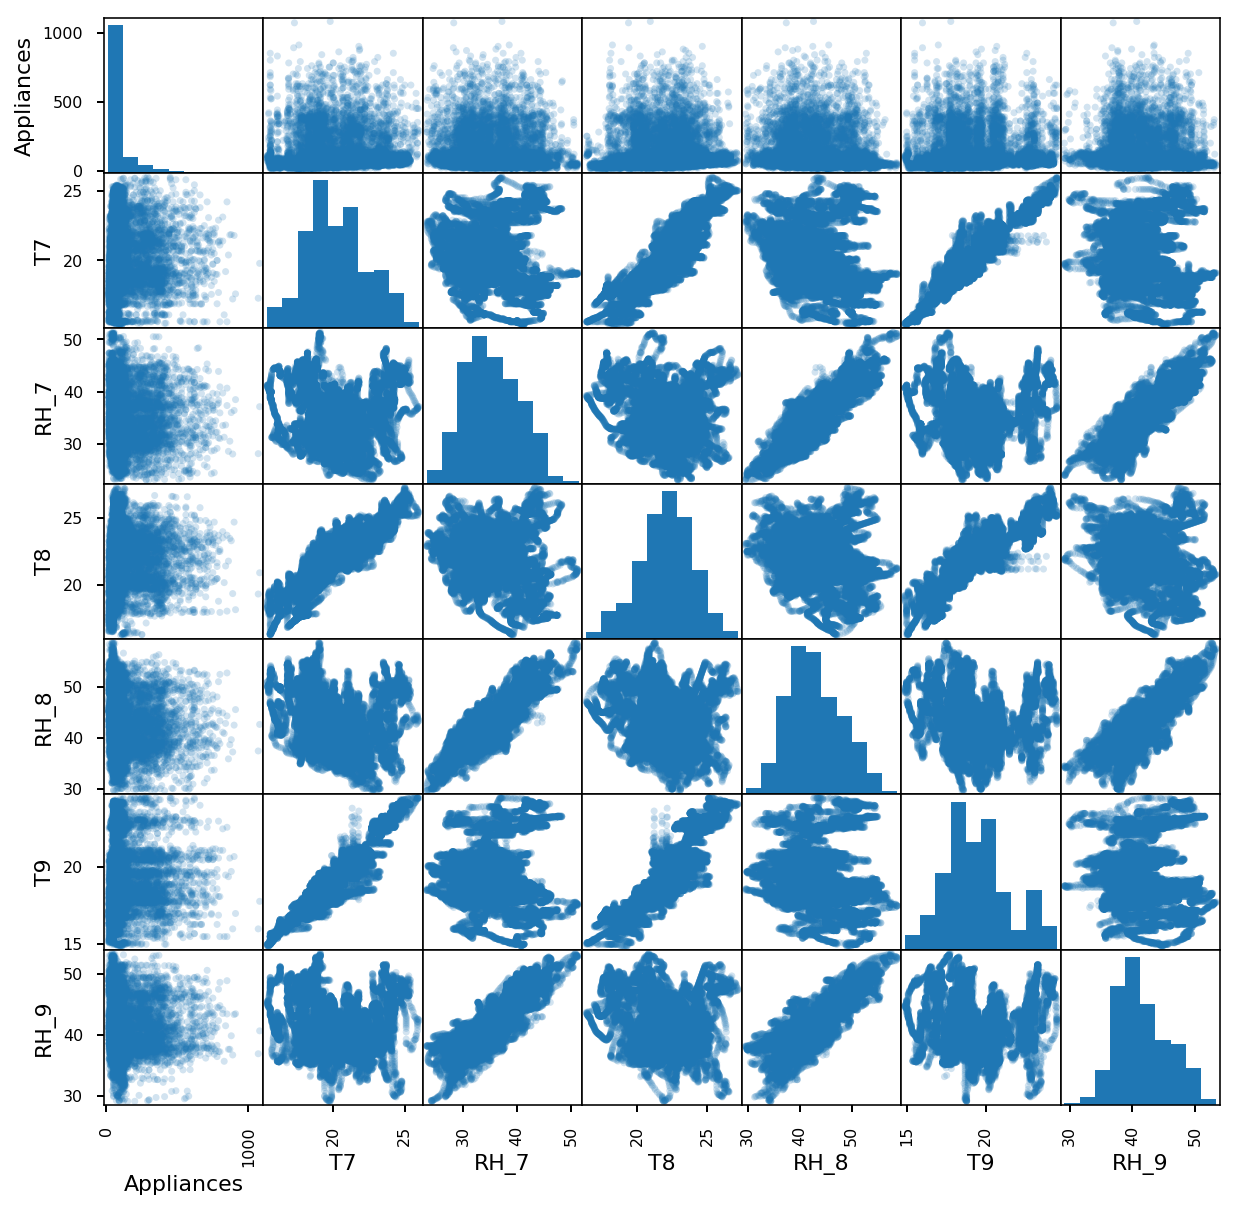

In [35]:


logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Pair plot for T7, RH_7, T8, RH_8, T9, RH_9and Appliances ')

try :

    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(room_temp[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9' ]], alpha = 0.2, diagonal = 'hist', ax = ax)
    plt.savefig("./Result/PairPlots_for_Of_Li_Teen_Parents.png")
except :
    logging.ERROR("Failed to show the pair plot of T7, RH_7, T8, RH_8, T9, RH_9 and Appliances ")  



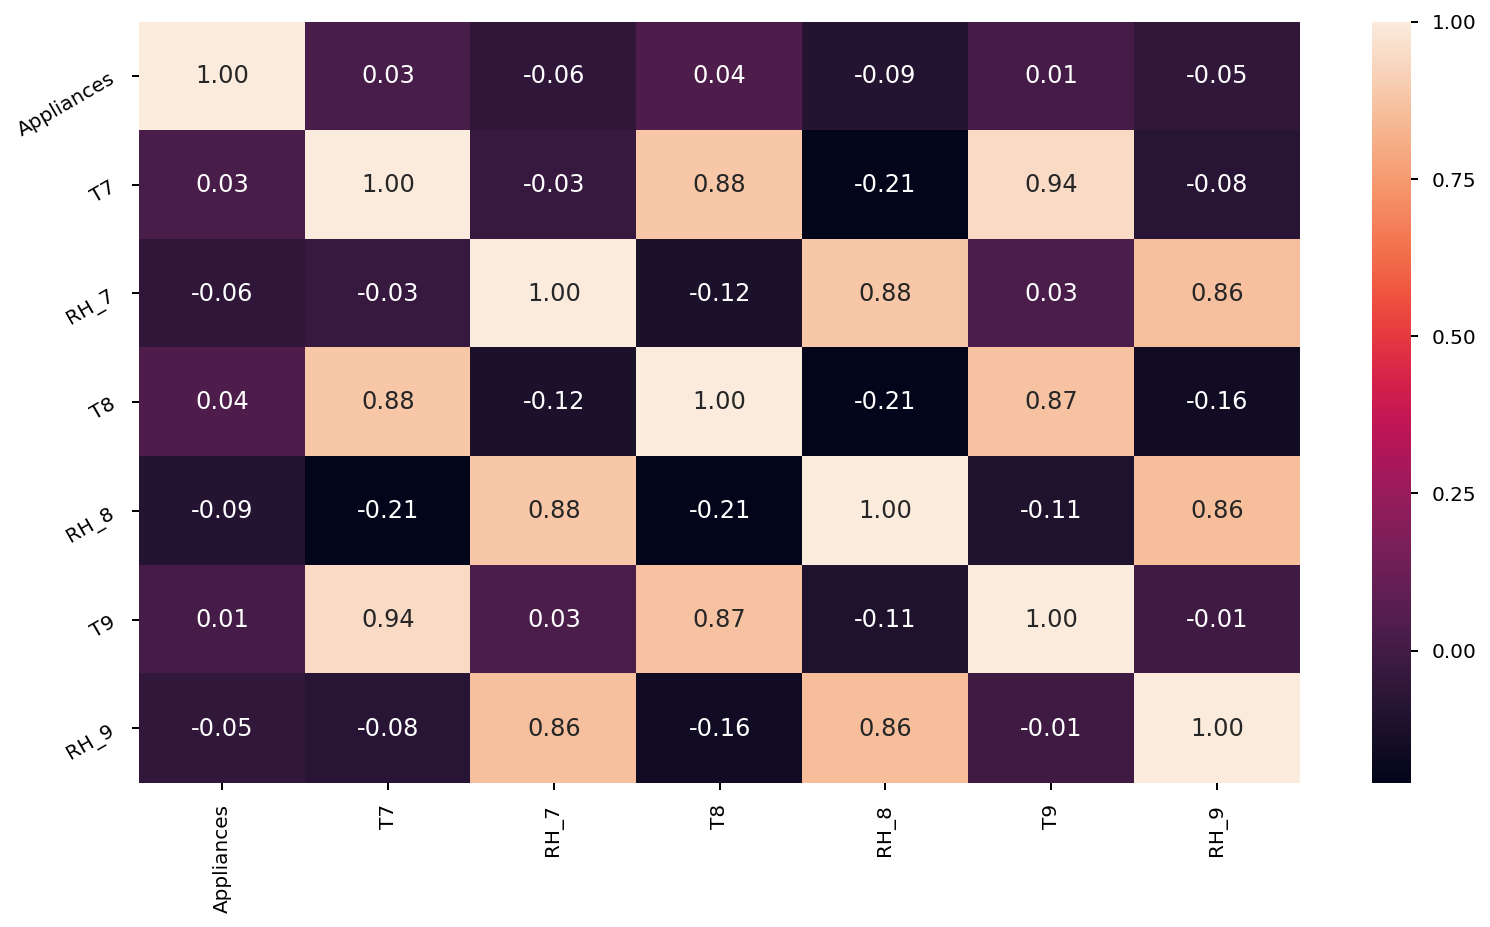

In [36]:



logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T7, RH_7, T8, RH_8, T9, RH_9and Appliances ')

try :
    correlation2 = room_temp.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation2,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
    plt.savefig("./Result/HeatMap_for_Of_Li_Teen_Parents.png")

except :
    logging.ERROR("Failed to show the Heat map of T7, RH_7, T8, RH_8, T9, RH_9 and Appliances ")  



<p>The above figure shows the Relationship between the energy consumption of appliances with: lights, T7, RH_7, T8, RH_8, T9, RH_9. T7 and RH_7 correspond to the ironing room conditions, T8 and RH_8 corrspond to the teenager room conditions and T9 and RH_9 correspond to the parents room condition.<p>

### Observation

The figure shows that there is a positive correlation between Appliances and T7, T8, T9, RH_9. The highest correlation is between Appliances and T8 (Teenager room temp), There is also negative correlation between the Appliances and RH_7, RH_8 and RH_9 (humidity in all the rooms).

In [43]:
outside_temp = data[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6']]

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':
C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if sys.path[0] == '':


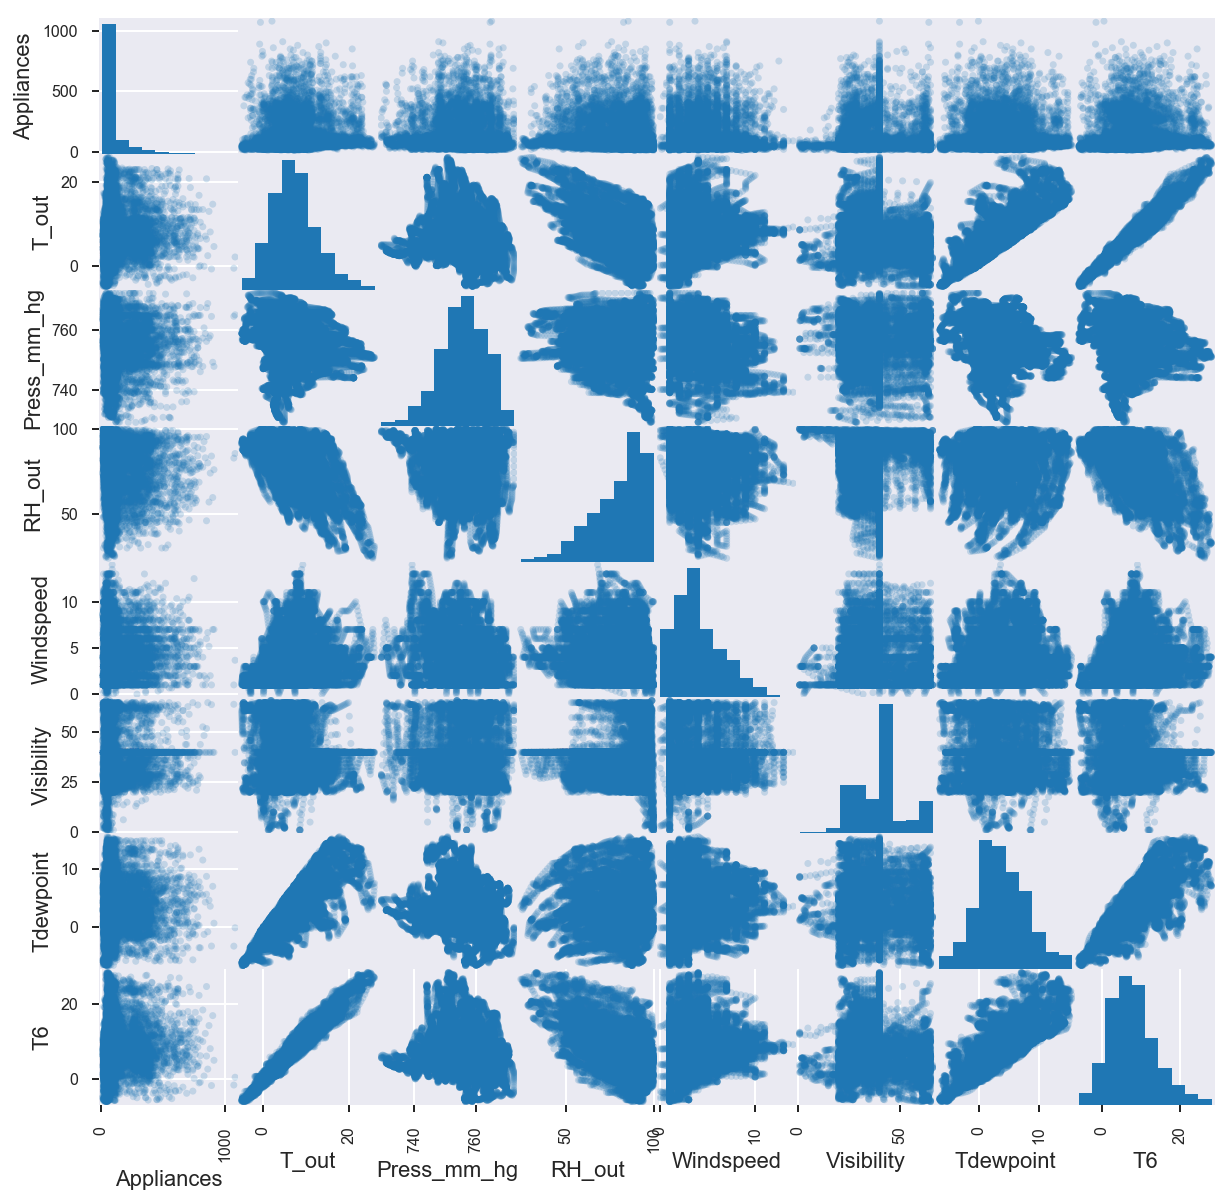

In [95]:



logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Pair Plot for T7, RH_7, T8, RH_8, T9, RH_9and Appliances ')

try :
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter_matrix(outside_temp [['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6' ]], alpha = 0.2, diagonal = 'hist', ax = ax)
    plt.savefig("./Result/PairPlots_for_Of_OutsideWeatherCondition.png")
except :
    logging.ERROR("Failed to show the Heat map of T7, RH_7, T8, RH_8, T9, RH_9 and Appliances ")  



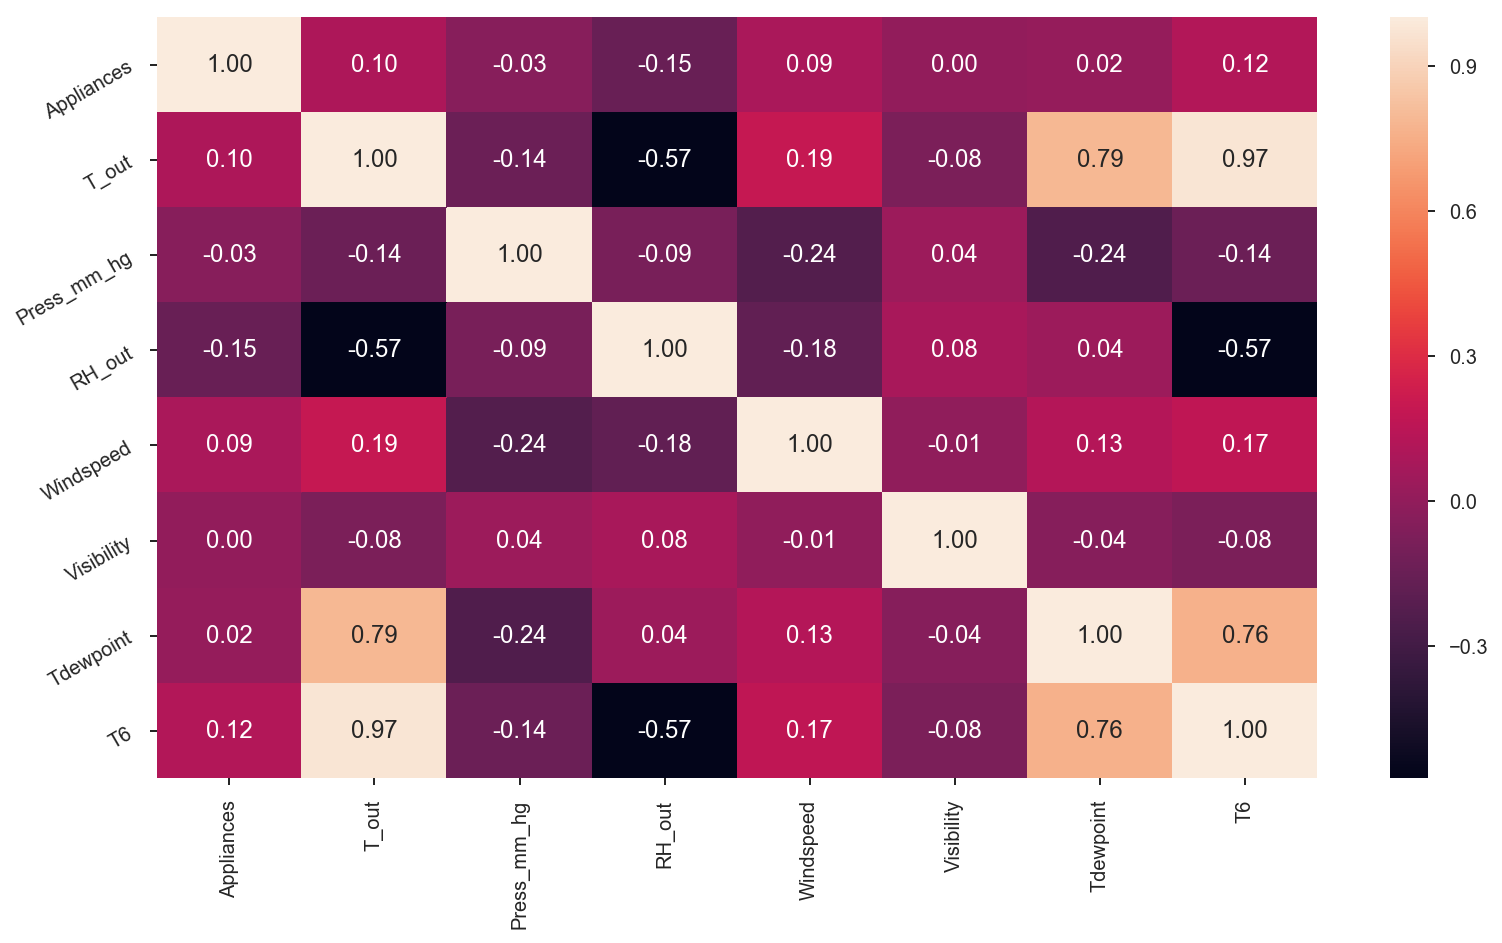

In [96]:



logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Heat map for T_out, RH_out, Press, Windspeed, Visibility, Tdewpoint, T6 and Appliances ')

try :
    correlation = outside_temp.corr()
    sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
    plt.figure(figsize=(13, 7))
    a = sns.heatmap(correlation,annot = True, fmt = '.2f')

    rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
    roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
    plt.savefig("./Result/HeatMap_for_Of_OutsideWeatherCondition.png")
    
except :
    logging.ERROR("Failed to show the Heat map of T_out, RH_out, Press, Windspeed, Visibility, Tdewpoint, T6 and Appliances ")  


<p>The above figure shows the Relationship between the energy consumption of appliances with: T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, NSM ans T6. All these variables correspond to the Temperature, Pressure and Humidity, respectively, from Chièvres weather station. NSM correspond to Number of seconds from Midnight. T6 correspond to the temp outside the building<p>

### Observation

The figure shows that there is a positive correlation between Appliances and T_out, Windspeed, Tdewpoint, NSM and T6. The highest correlation is between Appliances and T6 (Temp outside the building), There is also negative correlation between the Appliances and Pressure(Press_mm_hg), Humidity(RH_out).

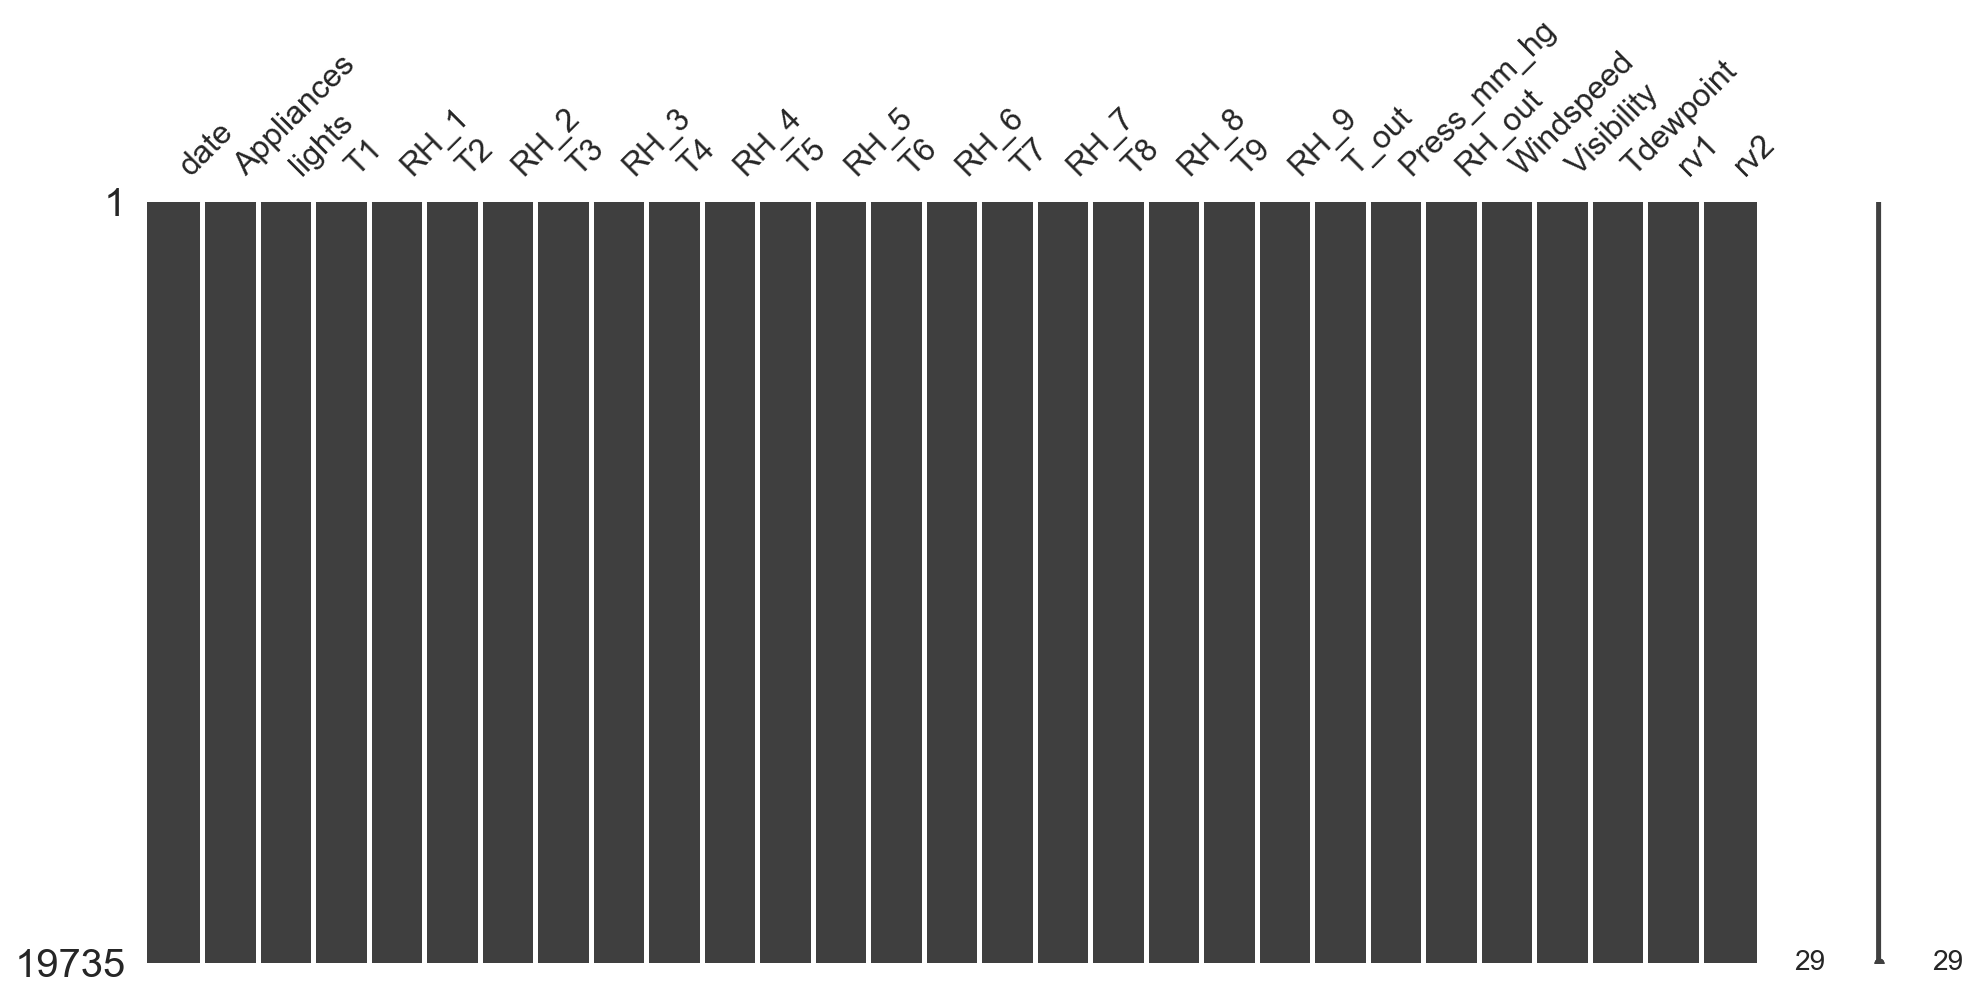

In [99]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Checking any Missing Value ')

try :
    msno.matrix(data, figsize = (16, 7), )
    plt.savefig("./Result/CheckingMissingValue.png")
    
except :
    logging.ERROR("Failed to show the missing plot graph ")  



In [38]:
logging.basicConfig(filename=logfilename, level=logging.DEBUG,
                        format='%(asctime)s - %(levelname)s - %(message)s')


logging.debug('Creating table using pivottable ')

from pivottablejs import pivot_ui
pivot_ui(data)

In [62]:
pandas_profiling.ProfileReport(data)

In [41]:
def dayoftheweek(day):
    if(day==0):
        return("Monday")
    if(day==1):
        return("Tuesday")
    if(day==2):
        return("Wednesday")
    if(day==3):
        return("Thurday")
    if(day==4):
        return("Friday")
    if(day==5):
        return("Saturday")
    if(day==6):
        return("Sunday")

In [54]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S")

In [58]:
data["dayoftheweek"] = data['date']
data["dayoftheweek"] = data['dayoftheweek'].apply(lambda x: dayoftheweek(x.dayofweek))
data.groupby('dayoftheweek').count()["date"]

dayoftheweek
Friday       2845
Monday       2778
Saturday     2736
Sunday       2736
Thurday      2880
Tuesday      2880
Wednesday    2880
Name: date, dtype: int64

In [59]:
def weekdaytype(day):
    if(day=="Saturday" or day == "Sunday"):
        return "weekend"
    else:
        return "Weekday"

In [62]:
data["WeekDayType"] = data["dayoftheweek"]
data["WeekDayType"] = data['WeekDayType'].apply(lambda x: weekdaytype(x))
data.groupby('WeekDayType').count()["date"]

WeekDayType
Weekday    14263
weekend     5472
Name: date, dtype: int64

In [63]:
months = data["date"].apply(lambda x: x.month)
months_indata = months.unique()

In [71]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def day_visual(Day,Month, parameter1, parameter2,save):
    new_data = data[(data['date'].map(lambda x: x.day) == Day) & (data['date'].map(lambda x: x.month) == Month)]
    plt.subplot(211)
    title = "Plot of "+parameter1+" and " +parameter2+" vs time"
    plt.title("Plot of "+parameter1+" and " +parameter2+" vs time" ) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter1])
    plt.xlabel("Time") 
    plt.ylabel(parameter1)
    plt.subplot(212) 
    plt.plot(new_data['date'].map(lambda x: x.hour), new_data[parameter2])
    plt.ylabel(parameter2)
    plt.xlabel("Time")
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
    return print("Correlation between ",parameter1," and ",parameter2,"is",str(new_data[parameter1].corr(new_data[parameter2])))
interact(day_visual,Day=day_date,Month=month_date, parameter1 = list(data),parameter2 = list(data), save=save)

interactive(children=(Dropdown(description='Day', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31), value=1), Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameter1', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType'), value='date'), Dropdown(description='parameter2', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

In [70]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def day_visual(Month, parameterx, parametery,save):
    new_data = data[(data['date'].map(lambda x: x.month) == Month)]
    title = "Plot of "+parameterx+" vs " +parametery
    plt.title(title) 
    plt.plot(new_data[parameterx], new_data[parametery])
    plt.xlabel(parameterx) 
    plt.ylabel(parametery)
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(day_visual,Month=month_date, parameterx = list(data),parametery = list(data), save=save)

interactive(children=(Dropdown(description='Month', options=(1, 2, 3, 4, 5), value=1), Dropdown(description='parameterx', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType'), value='date'), Dropdown(description='parametery', options=('date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType'), value='date'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.day_visual>

### Box Plots

In [68]:
# Version check
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print( __version__) # requires version >= 1.9.0

2.2.2


In [69]:
#plot your graphs offline inside a Jupyter Notebook Environment. First you need to initiate the Plotly Notebook mode as below:
init_notebook_mode(connected=True)
# Run at the start of every ipython notebook to use plotly.offline. This injects the plotly.js source files into the notebook.

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

In [78]:
%matplotlib inline
day_date = range(1, 32)
month_date = range(1, 6)
save = {False,True}
def box_visual(parameter1,save):
    new_data = data
    title = "Box Plot of "+parameter1
    plt.title(title) 
#     plt.figure()
    plt.boxplot(data[parameter1], 0,'gD')
    plt.xlabel(parameter1) 
    if(save):
        plt.savefig("./Result/"+str(Month)+"_"+title.replace(" ","_")+".png")
    plt.show()
interact(box_visual,Month=month_date, parameter1 = list(data)[1:], save=save)

interactive(children=(Dropdown(description='parameter1', options=('Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'dayoftheweek', 'WeekDayType'), value='Appliances'), Dropdown(description='save', options=(False, True), value=False), Output()), _dom_classes=('widget-interact',))

<function __main__.box_visual>

trace0 = go.Box(x = data['Appliances'])
data_box = [trace0]
py.iplot(data_box)

In [79]:
#seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)¶
# box plot to show distributions with respect to categories.
# A box plot (or box-and-whisker plot) showing the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable

#plt.rcParams['figure.figsize'] = (23,10)
# ax = sns.boxplot(x="make", y='price', data=data_1)

### Calculation of Outliers

<p><img alt="" src="./images/Anomalies_Calculation.PNG" /></p>
